In [ ]:
# Name: Muhammad Junaid Iftikhar
# Roll Number: Ezi-ML-B1-161
# Shift Time: 3:00 PM - 6:00 PM
# Internship Type: hybird

# TASK 03 Regression Analysis

# DATASET USED: https://www.kaggle.com/datasets/jamieleech/boston-housing-dataset

**Importing the dependecies**

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

**Importing the Boston house price dataset**

In [8]:
house_price_dataset = pd.read_csv('boston_housing.csv')

**checking the dataset**

In [9]:
house_price_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**checking num of rows and columns in dataset**

In [13]:
house_price_dataset.shape

(506, 14)

**Checking for missing values**

In [14]:
house_price_dataset.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


**Statistical measures of dataset**

In [15]:
house_price_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Correlation analysis**

<Axes: >

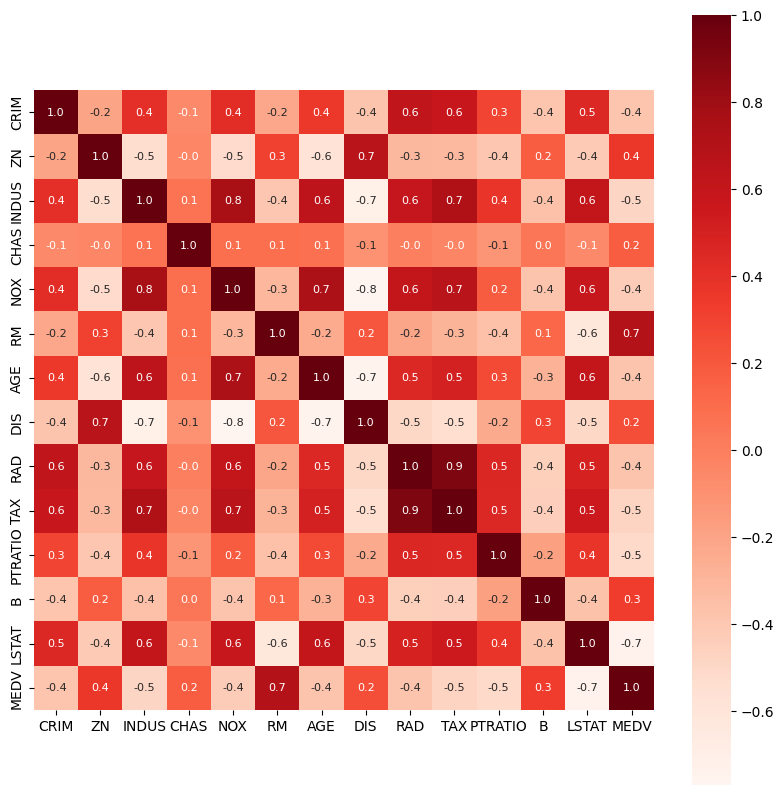

In [21]:
correlation = house_price_dataset.corr()

#constructing heat map tp understand the coorelation

plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Reds')


**Scatter plot to see coorelation of all features with target feature**

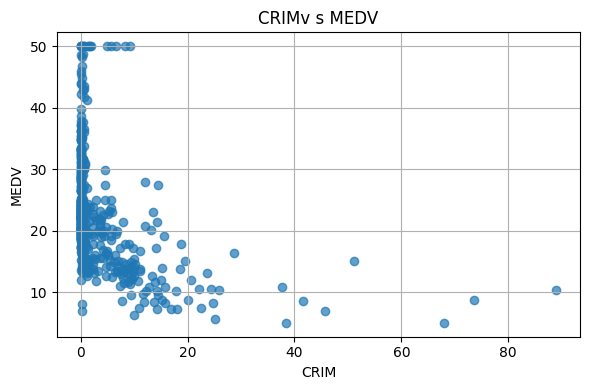

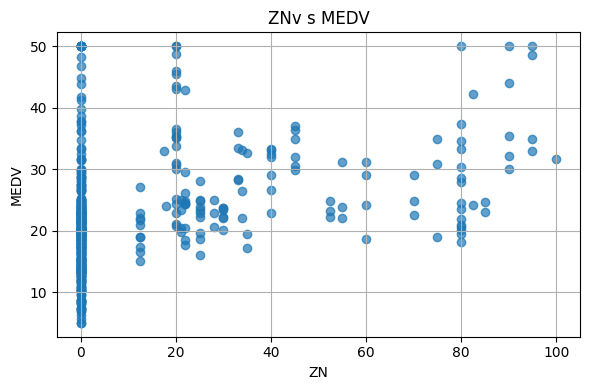

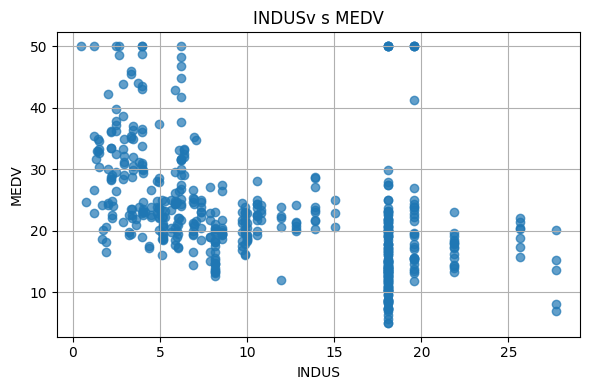

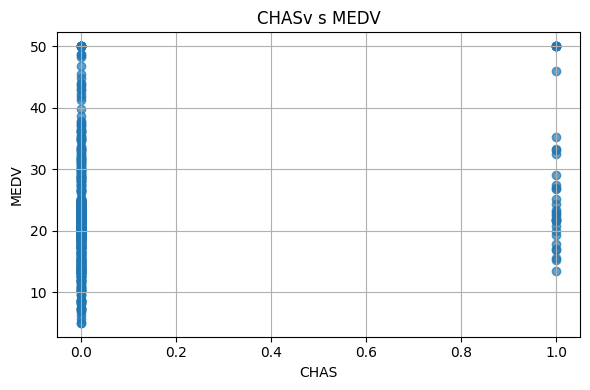

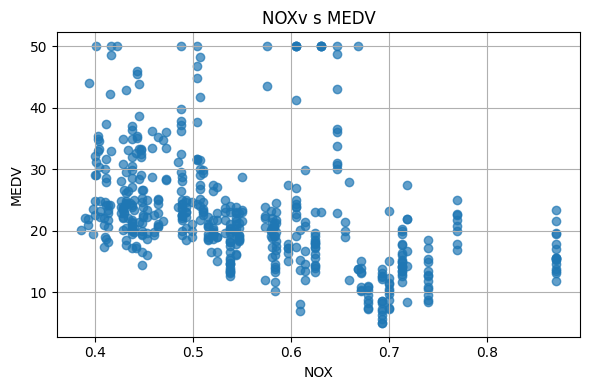

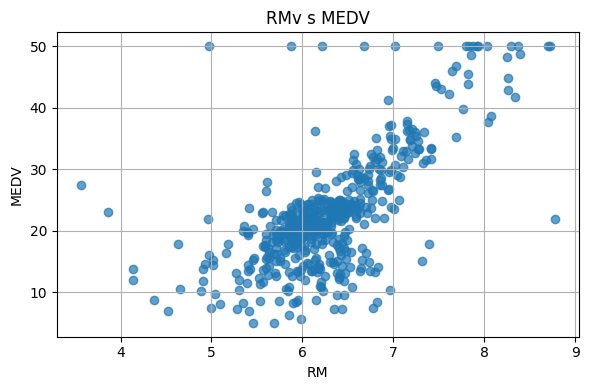

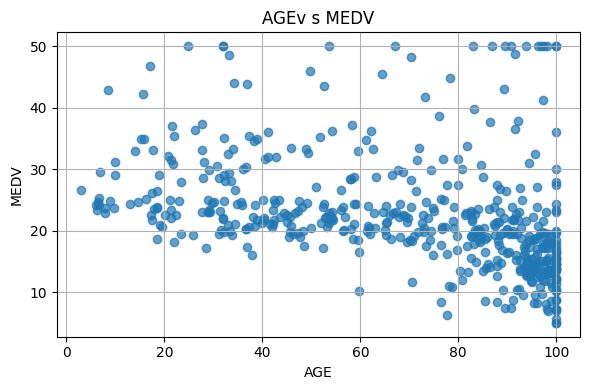

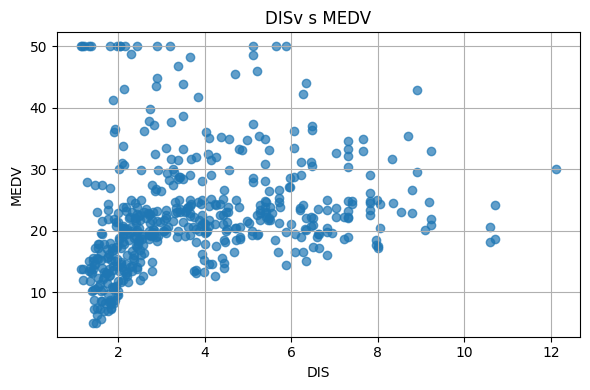

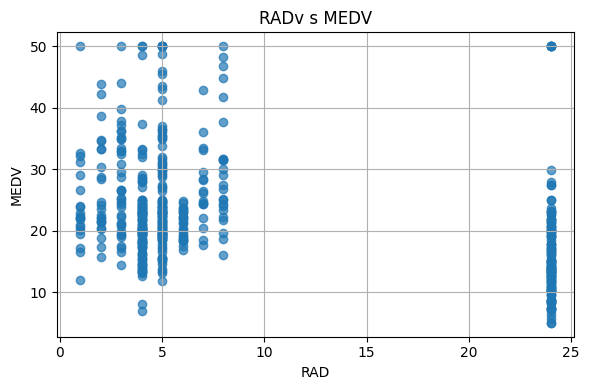

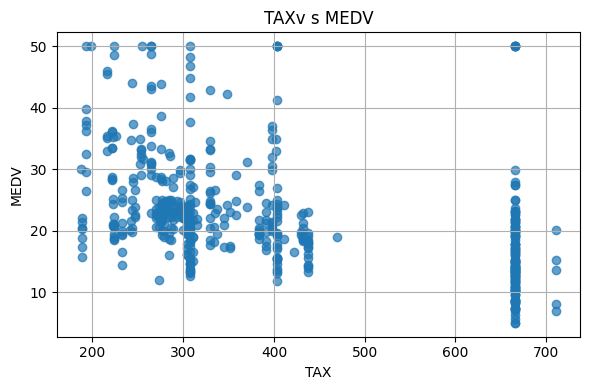

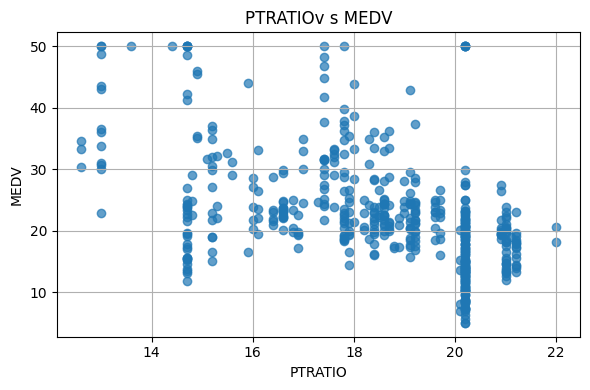

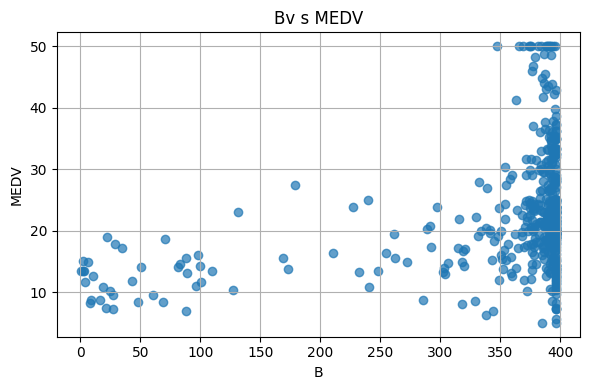

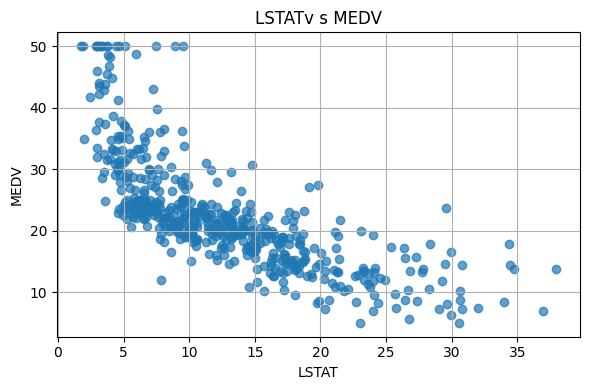

In [26]:
for column in house_price_dataset.columns[:-1]:
  plt.figure(figsize=(6,4))
  plt.scatter(house_price_dataset[column],house_price_dataset['MEDV'],alpha=0.7)
  plt.title(f'{column}v s MEDV')
  plt.xlabel(column)
  plt.ylabel('MEDV')
  plt.grid(True)
  plt.tight_layout()
  plt.show()


**Checking for multicolinearity using VIF**

In [28]:
X_const = add_constant(house_price_dataset)  # Add constant for intercept

vif = pd.DataFrame()
vif["Feature"] = house_price_dataset.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i+1) for i in range(house_price_dataset.shape[1])]  # i+1 to skip the constant
print(vif)

    Feature       VIF
0      CRIM  1.831537
1        ZN  2.352186
2     INDUS  3.992503
3      CHAS  1.095223
4       NOX  4.586920
5        RM  2.260374
6       AGE  3.100843
7       DIS  4.396007
8       RAD  7.808198
9       TAX  9.205542
10  PTRATIO  1.993016
11        B  1.381463
12    LSTAT  3.581585
13     MEDV  3.855684


**Splitting the data and target**

In [33]:
X = house_price_dataset.drop(['MEDV'],axis=1)
Y = house_price_dataset['MEDV']

**Scale the features**

In [45]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Train test split of 80/20**

In [46]:
X_train, X_test,Y_train,Y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=2)

**Model Training Linear Regression**

In [63]:
# loading the model
model = LinearRegression()

# traning the model with X_train
model.fit(X_train,Y_train)

# loading model for Polynomial Regresssion

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model_poly= LinearRegression()
model_poly.fit(X_train_poly, Y_train)


LinearRegression()

**Predicting of training and test data**

In [66]:
# Accuracy for prediction on traning data
training_data_prediction = model.predict(X_train)
training_data_prediction_poly = model_poly.predict(X_train_poly)

# Accuracy for prediction on test data
test_data_prediction = model.predict(X_test)
test_data_prediction_poly = model_poly.predict(X_test_poly)

**Evaluation on traning data**

In [67]:
# Simple Linear Regression Model

# R sqaure
r_sqaure_lr = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
mae_lr = metrics.mean_absolute_error(Y_train, training_data_prediction)

# Mean Squared Error
rmse_lr = metrics.mean_squared_error(Y_train, training_data_prediction)


# Polynomial Regression Model

# R sqaure
r_sqaure_plr = metrics.r2_score(Y_train, training_data_prediction_poly)

# Mean Absolute Error
mae_plr = metrics.mean_absolute_error(Y_train, training_data_prediction_poly)

# Mean Squared Error
rmse_plr = metrics.mean_squared_error(Y_train, training_data_prediction_poly)

# print Errors

print(" Simple Linear Regressor Evaluation : \n")
print("R sqaured  : ",r_sqaure_lr)
print("Mean Absolute Error : ",mae_lr)
print("Mean Sqaure Error  : ",np.sqrt(rmse_lr))

print("\n Polynomial Regressor Evaluation : \n")
print("R sqaured : ",r_sqaure_plr)
print("Mean Absolute Error : ",mae_plr)
print("Mean Sqaure Error  : ",np.sqrt(rmse_plr))


 Simple Linear Regressor Evaluation : 

R sqaured  :  0.7285831776605591
Mean Absolute Error :  3.3844575399167964
Mean Sqaure Error  :  4.791001312472464

 Polynomial Regressor Evaluation : 

R sqaured :  0.9295925088768032
Mean Absolute Error :  1.7775032100191406
Mean Sqaure Error  :  2.4401546051779435


**Evaluation on Test Data**

In [69]:
# Simple Linear Regression Model

# R sqaure
r_sqaure_lr_test = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
mae_lr_test = metrics.mean_absolute_error(Y_test, test_data_prediction)

# Mean Squared Error
rmse_lr_test = metrics.mean_squared_error(Y_test, test_data_prediction)


# Polynomial Regression Model

# R sqaure
r_sqaure_plr_test = metrics.r2_score(Y_test, test_data_prediction_poly)

# Mean Absolute Error
mae_plr_test = metrics.mean_absolute_error(Y_test, test_data_prediction_poly)

# Mean Squared Error
rmse_plr_test = metrics.mean_squared_error(Y_test, test_data_prediction_poly)

# print Errors

print(" Simple Linear Regressor Evaluation : \n")
print("R sqaured  : ",r_sqaure_lr_test)
print("Mean Absolute Error : ",mae_lr_test)
print("Mean Sqaure Error  : ",np.sqrt(rmse_lr_test))

print("\n Polynomial Regressor Evaluation : \n")
print("R sqaured : ",r_sqaure_plr_test)
print("Mean Absolute Error : ",mae_plr_test)
print("Mean Sqaure Error  : ",np.sqrt(rmse_plr_test))

 Simple Linear Regressor Evaluation : 

R sqaured  :  0.7789207451814422
Mean Absolute Error :  3.113043746893421
Mean Sqaure Error  :  4.300630200615762

 Polynomial Regressor Evaluation : 

R sqaured :  0.8963635527280829
Mean Absolute Error :  2.3654711277726186
Mean Sqaure Error  :  2.944519011172728


***Polynomial Regression perfroms better than simple linear Regressor, this shows that dataset contains strong non-linear relations that polynomial regressor can capture well***







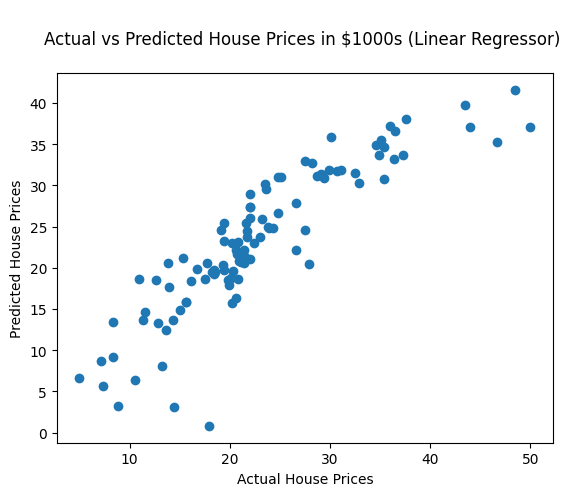

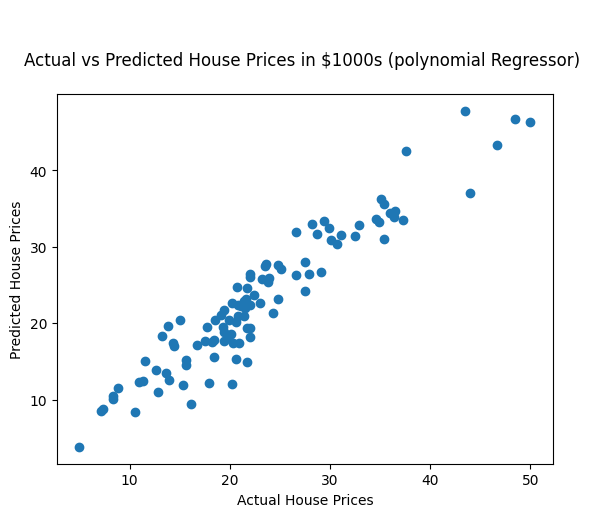

In [77]:
# Visualizing the actual vs predicted house prices for linear Regressor

plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("\nActual vs Predicted House Prices in $1000s (Linear Regressor) \n")
plt.show()

plt.scatter(Y_test,test_data_prediction_poly)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("\n\nActual vs Predicted House Prices in $1000s (polynomial Regressor) \n")
plt.show()

***Comparatively, polynomial Regressor graph is less scattered and more linear hence as as compared to linear regressor, it is estimating the median house price more effectively***